In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
plt.style.use('seaborn-colorblind')
plt.ion()

Dataset: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+title_principals.csv

In [3]:
!ls datasets

ls: cannot access 'datasets': No such file or directory


In [4]:
movies = pd.read_csv('https://media.githubusercontent.com/media/joaopmo/TP_ICD/main/datasets/IMDb_movies.csv')
movies.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
names = pd.read_csv('https://media.githubusercontent.com/media/joaopmo/TP_ICD/main/datasets/IMDb_names.csv')
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [6]:
ratings = pd.read_csv('https://media.githubusercontent.com/media/joaopmo/TP_ICD/main/datasets/IMDb_ratings.csv')
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [7]:
title_principals = pd.read_csv('https://media.githubusercontent.com/media/joaopmo/TP_ICD/main/datasets/IMDb_title_principals.csv')
title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


Primeiro vamos definir o significado que queremos dar para os dados no dataset. As quatro tabelas possuem uma série de métricas sobre filmes, avaliações e perfil de usuários do site IMDb. A parte mais interessante do dataset é justamente a que envolve os usuários, iremos então tratar estes dados como uma amostra sobre a população de pessoas que assistem filmes. Não é fácil identificar a qualidade dessa amostra, pode ser por exemplo, que os usuários desse tipo de plataforma sejam em sua maioria entusiastas, não representando bem a população em geral. 

Vamos iniciar testando algumas hipotéses:

<div style="color:red">
Jovens (até 18 anos) tendem a dar notas mais altas que outras faixas etárias
</div>

In [8]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [9]:
faixas = ratings[['allgenders_0age_avg_vote', 'allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']].dropna()
faixas = faixas.reset_index(drop=True)
faixas

,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote
0,7.2,6.0,5.7,6.6
1,6.0,6.1,6.0,6.3
2,7.5,7.0,7.0,7.1
3,3.0,6.4,6.7,7.0
4,6.0,5.9,6.2,6.3
...,...,...,...,...
33331,4.0,5.7,5.6,5.3
33332,5.1,5.2,5.1,4.9
33333,9.3,8.6,8.1,6.8
33334,6.0,4.0,3.9,4.4


In [10]:
jovens = faixas['allgenders_0age_avg_vote'].to_frame(name="vals")
jovens.describe()

,vals
count,33336.000000
mean,6.195134
std,1.848898
min,1.000000
25%,5.000000
50%,6.000000
75%,7.200000
max,10.000000


In [11]:
geral = faixas[['allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']].sum(axis=1).to_frame(name="vals")
geral /= 3
geral.describe()

,vals
count,33336.000000
mean,6.075230
std,1.164201
min,1.033333
25%,5.466667
50%,6.233333
75%,6.866667
max,9.766667


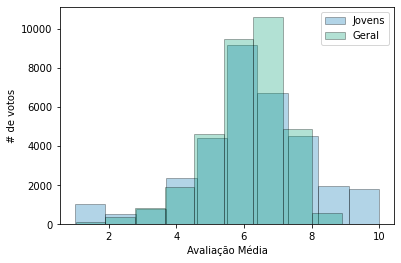

In [12]:
plt.hist(jovens['vals'], alpha=0.3, edgecolor='k', label='Jovens')
plt.hist(geral['vals'], alpha=0.3, edgecolor='k', label='Geral')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

### Bootstrap

In [13]:
def bootstrap_mean(df, column, n=5000, size=None):
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample = df[column].sample(size, replace=True)
        values[i] = sample.mean()
    return values

In [14]:
def bootstrap_diff(df1, df2, column, n=5000, size=None):
    if size is None:
        size = len(df1)
    values = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size, replace=True)
        sample2 = df2[column].sample(size, replace=True)
        values[i] = sample1.mean() - sample2.mean()
    return values

In [15]:
def ic_bootstrap(df, column, n=5000, size=None):
    values = bootstrap_mean(df, column, n, size)
    return (np.percentile(values, 2.5), np.percentile(values, 97.5))

### Checando intervalos de confiança com Bootstrap

In [16]:
ic_bootstrap(jovens, 'vals')

(6.1751460133189315, 6.215173311135088)

In [17]:
ic_bootstrap(geral, 'vals')

(6.0629149418046655, 6.08761519078473)

In [18]:
diff = bootstrap_diff(jovens, geral, 'vals')

Text(0, 0.5, 'Freq')

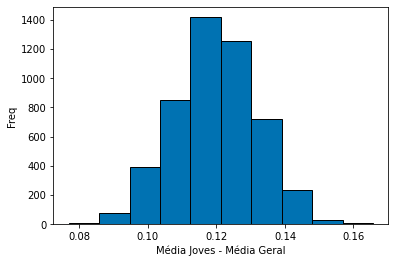

In [19]:
plt.hist(diff, edgecolor='k')
plt.xlabel('Média Joves - Média Geral')
plt.ylabel('Freq')

Podemos ver que o intervalo das médias não se cruzam e que o plot da diferença dos intervalos não contém o valor zero no eixo x, o que confirma nossa hipótese. Agora testaremos uma nova hipótese:
<div style="color:red">
Filmes produzidos nos EUA tendem a ter melhores avaliações 
</div>

In [20]:
print(ratings.columns)
print()
print(movies.columns)

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [21]:
vc = pd.merge(ratings[['imdb_title_id', 'mean_vote']], movies[['imdb_title_id', 'country']], on='imdb_title_id')
vc

,imdb_title_id,mean_vote,country
0,tt0000009,5.9,USA
1,tt0000574,6.3,Australia
2,tt0001892,6.0,"Germany, Denmark"
3,tt0002101,5.3,USA
4,tt0002130,6.9,Italy
...,...,...,...
85850,tt9908390,5.5,"France, Belgium"
85851,tt9911196,7.9,Netherlands
85852,tt9911774,7.8,India
85853,tt9914286,9.4,Turkey


In [22]:
us = vc[vc['country'] == 'USA']
us.describe()

,mean_vote
count,28511.000000
mean,5.951036
std,1.189045
min,1.400000
25%,5.200000
50%,6.100000
75%,6.800000
max,9.700000


In [23]:
no_us = vc[vc['country'] != 'USA']
no_us.describe()

,mean_vote
count,57344.000000
mean,6.363222
std,1.113067
min,1.000000
25%,5.700000
50%,6.500000
75%,7.100000
max,9.800000


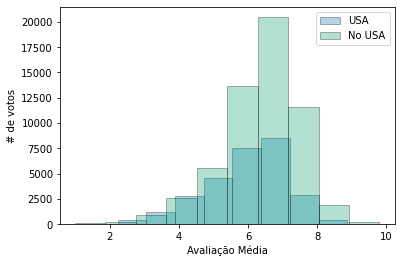

In [24]:
plt.hist(us['mean_vote'], alpha=0.3, edgecolor='k', label='USA')
plt.hist(no_us['mean_vote'], alpha=0.3, edgecolor='k', label='No USA')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

### Checando intervalos de confiança com Bootstrap

In [25]:
ic_bootstrap(us, 'mean_vote')

(5.937272894672211, 5.965214478622207)

In [26]:
ic_bootstrap(no_us, 'mean_vote')

(6.354200744628937, 6.372428065708773)

In [27]:
samples_us = bootstrap_mean(us, 'mean_vote')
samples_no_us = bootstrap_mean(no_us, 'mean_vote')
to_plot = pd.DataFrame()
to_plot['USA'] = samples_us
to_plot['No USA'] = samples_no_us

Text(0, 0.5, 'Média')

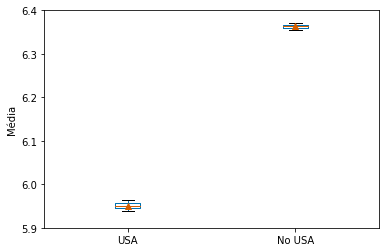

In [28]:
to_plot.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.ylim(5.9, 6.4)
plt.ylabel('Média')

O intervalo das médias não se cruzam, porém, a nota média dos filmes dos EUA é menor que a de produções de outros países, logo, rejeitamos nossa hipótese. Outra hipótese:

<div style="color:red">
Filmes que têm 'Action' como um dos gêneros são mais populares
</div>

In [29]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [30]:
gv = movies[['genre', 'votes']].dropna()
gv            

,genre,votes
0,Romance,154
1,"Biography, Crime, Drama",589
2,Drama,188
3,"Drama, History",446
4,"Adventure, Drama, Fantasy",2237
...,...,...
85850,Comedy,398
85851,"Comedy, Drama",724
85852,Drama,265
85853,"Drama, Family",194


In [31]:
action = gv[gv['genre'].str.contains("Action")]
action.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,votes
count,12948.00000
mean,20712.99985
std,87583.58916
min,100.00000
25%,251.00000
50%,734.00000
75%,3632.75000
max,2241615.00000


In [32]:
no_action = gv[~gv['genre'].str.contains("Action")]
no_action.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,votes
count,72907.00000
mean,7500.94817
std,44625.09056
min,99.00000
25%,199.00000
50%,455.00000
75%,1578.50000
max,2278845.00000


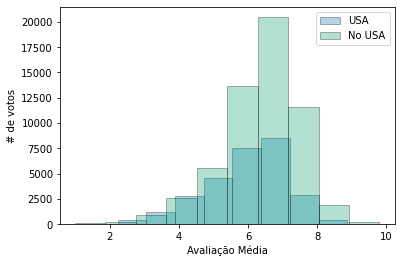

In [33]:
plt.hist(us['mean_vote'], alpha=0.3, edgecolor='k', label='USA')
plt.hist(no_us['mean_vote'], alpha=0.3, edgecolor='k', label='No USA')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

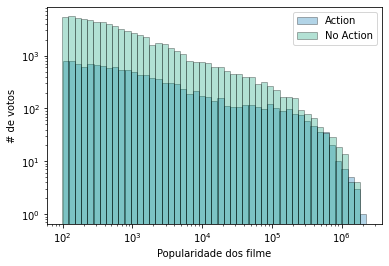

In [34]:
bins = np.logspace(np.log10(action['votes'].min()), np.log10(action['votes'].max()))
plt.hist(action['votes'], bins=bins, alpha=0.3, edgecolor='k', label='Action')
bins = np.logspace(np.log10(no_action['votes'].min()), np.log10(no_action['votes'].max()))
plt.hist(no_action['votes'], bins=bins, alpha=0.3, edgecolor='k', label='No Action')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Popularidade dos filme')
plt.ylabel('# de votos')
plt.legend()

### Checando intervalos de confiança com Bootstrap

In [35]:
ic_bootstrap(action, 'votes')

(19206.33421184739, 22229.52269269385)

In [36]:
ic_bootstrap(no_action, 'votes')

(7174.536456033029, 7824.734102692471)

In [37]:
diff = bootstrap_diff(action, no_action, 'votes')

Text(0, 0.5, 'Freq')

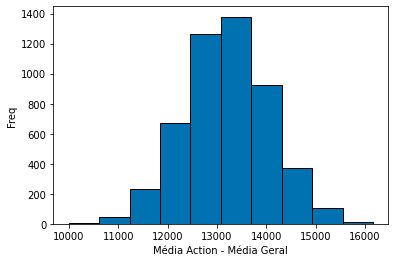

In [38]:
plt.hist(diff, edgecolor='k')
plt.xlabel('Média Action - Média Geral')
plt.ylabel('Freq')

O intervalo das médias não se cruzam, filmes de ação recebem em média milhares de votos a mais do que produções sem esse gênero, confirmamos a hipótese.

### Checando intervalos de confiança com Bootstrap

Podemos analisar desse dataset o que de fato uma nota diz sobre um filme, analisando quão rara é tal nota quando tiramos a média de notas da população. Por exemplo, a partir disso, podemos formular a seguinte hipótese: uma nota média 8 diz pouco sobre a qualidade de um filme, já que ela é bem comum na base de dados. Tentaremos a partir daqui buscar evidências em dados que confirmem ou descartem essa ideia.

Uma maneira de testar essa hipótese é construir um intervalo de confiança utilizando a técnica de bootstrap, estratégia que será utilizada aqui.

Aplicando o bootstrap na coluna com os dados desejados:

In [40]:
result = bootstrap_mean(ratings,'mean_vote', 10000, 1000)
result

array([6.2646, 6.1947, 6.2131, ..., 6.1597, 6.2388, 6.2474])

Plotando o resultado - Note como o resultado obtido se aproxima de uma distribuição normal:

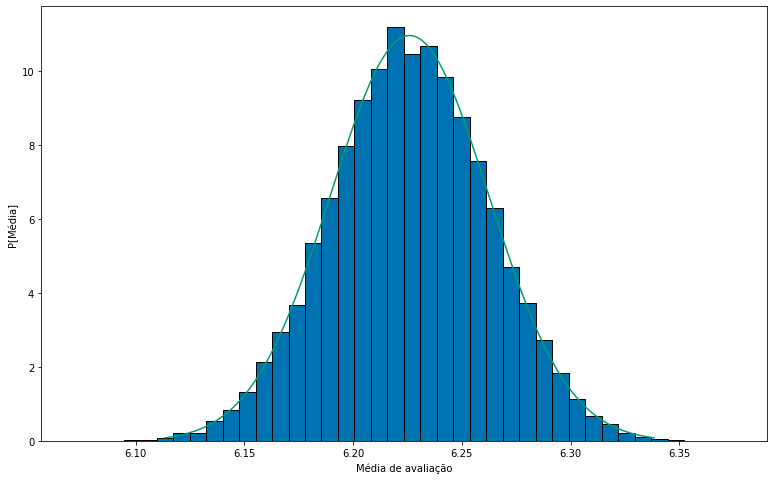

In [41]:
plt.figure(figsize=(13,8))
plt.hist(result, bins=40, edgecolor='k', density=True)
res = stats.norm(loc=result.mean(), scale=result.std())
res_np = np.linspace(res.ppf(0.001), res.ppf(0.999),10000)
plt.plot(res_np, res.pdf(res_np))
plt.xlabel('Média de avaliação')
plt.ylabel('P[Média]')
plt.show()

A maior concentração de valores se encontra entre 6.15 e 6.30, como mostrado abaixo:

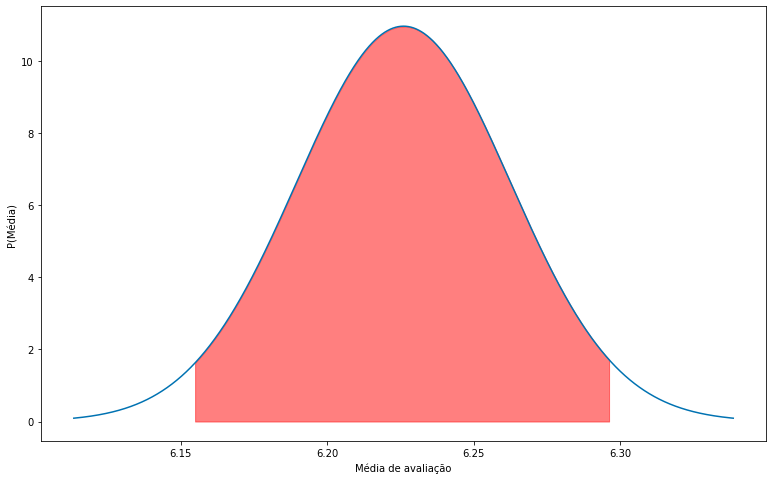

In [42]:
plt.figure(figsize=(13,8))
plt.plot(res_np, res.pdf(res_np))
filler = np.linspace(np.percentile(result, 2.5),np.percentile(result, 97.5))
plt.fill_between(filler, res.pdf(filler), color='r', alpha=0.5)
plt.xlabel('Média de avaliação')
plt.ylabel('P(Média)')
plt.show()

Como o valor apresentado na hipótese, 8, encontra-se fora dessa área, temos que ele é um valor de rara ocorrência e portanto, a hipótese é rejeitada, uma vez que um filme não apresenta média igual a ele frequentemente.